<a id='intro'></a>
## Introduction

Soccer is the most played sport in the world and in my birth country: Brazil. One of my biggest passions and definitely my favorite hobby. Therefore, I decided to analyze [Hugo Mathien’s European Soccer Database](https://www.kaggle.com/hugomathien/soccer/), aiming to discover new things about [The Beautiful Game](https://www.fifplay.com/why-football-is-still-the-beautiful-game/).

The analysis will be perfomed solely through Python 3 and will focus on answering the following questions for the [Top 4 Leagues in Europe](https://bleacherreport.com/articles/786046-power-ranking-the-top-30-leagues-in-europe#slide30) from 2008 to 2016:

<ul>
<li>Which are the best teams at home-field games?</li>
<li>Which are the best teams at away-field games?</li>
<li>Which league had the biggest fouls per match average?</li>
<li>Which teams had the biggest ball possession average?</li>
<li>Which teams had most corners per match?</li>
<li>Which are the teams with most crosses per match?</li>
<li>Which are the best teams in nacional leagues by season?</li>
<li>Are there any strong correlations between the result of the match and the ball possession, team fouls, team crosses or team corners?</li>
<li>Are there any matches with exceptional game values (goals, cards, fouls, crosses, etc.)?</li>
</ul>

To start, I will import the necessary libraries, as well as the CSV files (exported from the SQL database with [DB Browser for SQLite](https://sqlitebrowser.org/)) and set some project settings:

In [1]:
# Importing libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import seaborn as sns
from IPython.display import HTML
%matplotlib inline

In [2]:
# Settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('mode.chained_assignment', None)

In [3]:
# CSV Files
league_df = pd.read_csv('league.csv')
team_df = pd.read_csv('team.csv')
match_df = pd.read_csv('match.csv')

<a id='wrangling'></a>
## Data Wrangling

In this section of the report I will understand the general properties of the imported dataframes, merge them, drop unhelpful columns, select the rows with desired leagues and check for missing values.


### General Properties
The main goal here is to understand the variables datatypes and values, that will help me manage the data once I start to select the necessary information.  
Fortunaly, most of the column names are self-explanatory, but I do recommend to take a look at the [Kaggle Data Page](https://www.kaggle.com/hugomathien/soccer) if there's any question about the columns meaning, since I will not be covering the meaning of the columns, once I will drop most of then.

#### League Dataframe

It's a small and simple dataframe, i can just look the rows and their datatypes.

In [4]:
league_df

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [5]:
league_df.dtypes

id             int64
country_id     int64
name          object
dtype: object

#### Team Dataframe

It contains all the teams with their IDs, names and names abbreviation.  
Let's take a look on it's shape and datatypes.

In [6]:
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [7]:
team_df.shape

(299, 5)

In [8]:
team_df.dtypes

id                    int64
team_api_id           int64
team_fifa_api_id    float64
team_long_name       object
team_short_name      object
dtype: object

#### Match Dataframe

The dataframe with most information. It's a good idea to take a deeper look and understand it's values, especially the identifiers and the ones directly related to the proposed questions: foulcommit, card, cross, corner and possession.

In [9]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [10]:
match_df.shape

(25979, 115)

In [11]:
match_df.dtypes

id                    int64
country_id            int64
league_id             int64
season               object
stage                 int64
date                 object
match_api_id          int64
home_team_api_id      int64
away_team_api_id      int64
home_team_goal        int64
away_team_goal        int64
home_player_X1      float64
home_player_X2      float64
home_player_X3      float64
home_player_X4      float64
home_player_X5      float64
home_player_X6      float64
home_player_X7      float64
home_player_X8      float64
home_player_X9      float64
home_player_X10     float64
home_player_X11     float64
away_player_X1      float64
away_player_X2      float64
away_player_X3      float64
away_player_X4      float64
away_player_X5      float64
away_player_X6      float64
away_player_X7      float64
away_player_X8      float64
away_player_X9      float64
away_player_X10     float64
away_player_X11     float64
home_player_Y1      float64
home_player_Y2      float64
home_player_Y3      

In [12]:
# Checking first two unique values of foulcommit column
match_df.foulcommit.unique()[1:3]

array(['<foulcommit><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>1</elapsed><player2>32569</player2><player1>25518</player1><sortorder>1</sortorder><team>10261</team><n>267</n><type>foulcommit</type><id>378824</id></value><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>2</elapsed><player2>24157</player2><player1>30929</player1><sortorder>0</sortorder><team>10261</team><n>277</n><type>foulcommit</type><id>378826</id></value><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>3</elapsed><player2>24148</player2><player1>29581</player1><sortorder>1</sortorder><team>10261</team><n>254</n><type>foulcommit</type><id>378830</id></value><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>5</elapsed><player2>40565</player2><player1>30373</pl

In [13]:
# Checking first two unique values of card column
match_df.card.unique()[1:3]

array(['<card><value><comment>y</comment><stats><ycards>1</ycards></stats><event_incident_typefk>73</event_incident_typefk><elapsed>78</elapsed><card_type>y</card_type><subtype>serious_fouls</subtype><player1>24157</player1><sortorder>1</sortorder><team>10260</team><n>342</n><type>card</type><id>379481</id></value><value><comment>y</comment><stats><ycards>1</ycards></stats><event_incident_typefk>73</event_incident_typefk><elapsed>82</elapsed><card_type>y</card_type><subtype>serious_fouls</subtype><player1>30362</player1><sortorder>1</sortorder><team>10260</team><n>346</n><type>card</type><id>379503</id></value><value><comment>y</comment><stats><ycards>1</ycards></stats><event_incident_typefk>70</event_incident_typefk><elapsed>90</elapsed><card_type>y</card_type><player1>30829</player1><sortorder>1</sortorder><team>10260</team><n>353</n><type>card</type><id>379547</id></value></card>',
       '<card />'], dtype=object)

In [14]:
# Checking first two unique values of cross column
match_df.cross.unique()[1:3]

array(['<cross><value><stats><crosses>1</crosses></stats><event_incident_typefk>7</event_incident_typefk><elapsed>7</elapsed><subtype>cross</subtype><player1>30829</player1><sortorder>1</sortorder><team>10260</team><n>265</n><type>cross</type><id>378863</id></value><value><stats><crosses>1</crosses></stats><event_incident_typefk>7</event_incident_typefk><elapsed>14</elapsed><subtype>cross</subtype><player1>24148</player1><sortorder>0</sortorder><team>10260</team><n>255</n><type>cross</type><id>378921</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>19</elapsed><subtype>cross</subtype><player1>38807</player1><sortorder>0</sortorder><team>10261</team><n>280</n><type>corner</type><id>378960</id></value><value><stats><crosses>1</crosses></stats><event_incident_typefk>7</event_incident_typefk><elapsed>19</elapsed><subtype>cross</subtype><player1>30929</player1><sortorder>5</sortorder><team>10261</team><n>292</n><type>cross</typ

In [15]:
# Checking first two unique values of corner column
match_df.corner.unique()[1:3]

array(['<corner><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>19</elapsed><subtype>cross</subtype><player1>38807</player1><sortorder>0</sortorder><team>10261</team><n>280</n><type>corner</type><id>378960</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>330</event_incident_typefk><elapsed>22</elapsed><subtype>short</subtype><player1>40565</player1><sortorder>0</sortorder><team>10261</team><n>263</n><type>corner</type><id>378992</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>22</elapsed><subtype>cross</subtype><player1>38807</player1><sortorder>4</sortorder><team>10261</team><n>293</n><type>corner</type><id>378996</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>48</elapsed><subtype>cross</subtype><player1>24154</player1><sortorder>2</sortorder><team>10260</team><n>300</n><type>

In [16]:
# Checking first two unique values of possession column
match_df.possession.unique()[1:3]

array(['<possession><value><comment>56</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>44</awaypos><homepos>56</homepos><n>68</n><type>special</type><id>379029</id></value><value><comment>54</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>4</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>117</n><type>special</type><id>379251</id></value><value><comment>54</comment><event_incident_typefk>352</event_incident_typefk><elapsed>70</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>190</n><type>special</type><id>379443</id></value><value><comment>55</comment><elapsed_plus>5</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>45</awaypos><homepo

### Data Cleaning and Feature Engineering

Here it starts the process of preparing data for analysis. I'll be removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted. This data is usually not necessary or helpful when it comes to analyzing data because it may hinder the process or provide inaccurate results.  
On top of that, I'm going to use the knowledge acquired by inspecting the dataframes to create new features, aiming to facilitate the study.

#### Merging Dataframes

Merging match_df, league_df and team_df pursuing a combined dataframe with all the match details, team and league names.

In [17]:
# Creating a DataFrame merging the match and league DataFrames
match_league_df = pd.merge(league_df[['id', 'name']], match_df, left_on='id', right_on='league_id', how = 'outer')

# Creating a DataFrame merging the match_league_df and team_df on team_api_id of the home team.
match_league_home_team_name_df = pd.merge(team_df[['team_api_id', 'team_long_name']], 
                                          match_league_df, 
                                          left_on='team_api_id', 
                                          right_on='home_team_api_id', 
                                          how = 'outer')

# Creating a DataFrame merging the match_league_home_team_name_df and team_df on team_api_id of the away team.
match_combined_df = pd.merge(team_df[['team_api_id', 'team_long_name']], 
                             match_league_home_team_name_df, 
                             left_on='team_api_id', 
                             right_on='away_team_api_id', 
                             how = 'outer')

# Looking the first 5 rows of the combined DataFrame
match_combined_df.head()

,team_api_id_x,team_long_name_x,team_api_id_y,team_long_name_y,id_x,name,id_y,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,9987,KRC Genk,9993,Beerschot AC,1,Belgium Jupiler League,82,1,1,2008/2009,18,2009-01-18 00:00:00,492769,9993,9987,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,3.3,2.62,2.55,3.30,2.40,2.50,3.2,2.3,2.50,3.10,2.50,NaN,NaN,NaN,2.50,3.1,2.50,2.60,3.2,2.60,2.40,3.25,2.65,2.60,3.25,2.45,2.50,3.2,2.50
1,9987,KRC Genk,9993,Beerschot AC,1,Belgium Jupiler League,397,1,1,2009/2010,20,2009-12-26 00:00:00,665651,9993,9987,1,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,13131.0,37988.0,36849.0,38784.0,33622.0,41106.0,38322.0,38800.0,166676.0,38371.0,36868.0,91929.0,38785.0,39498.0,94462.0,148314.0,32863.0,42153.0,38794.0,43158.0,38293.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.5,4.50,1.75,3.35,4.30,1.75,3.4,3.7,1.83,3.20,3.75,NaN,NaN,NaN,1.75,3.5,4.20,1.83,3.5,4.33,1.83,3.25,4.00,1.80,3.40,4.00,1.83,3.3,3.80
2,9987,KRC Genk,9993,Beerschot AC,1,Belgium Jupiler League,590,1,1,2010/2011,18,2010-12-05 00:00:00,838694,9993,9987,0,1,1.0,3.0,4.0,7.0,1.0,3.0,5.0,7.0,9.0,4.0,6.0,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,3.0,4.0,7.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,10.0,131408.0,37988.0,36849.0,38322.0,166676.0,38371.0,36852.0,36868.0,38786.0,104386.0,39875.0,170323.0,38293.0,43158.0,94462.0,148314.0,32863.0,39498.0,104411.0,127191.0,42153.0,38794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.80,3.6,1.91,4.00,3.35,1.80,3.50,3.3,1.9,3.60,3.30,1.83,NaN,NaN,NaN,3.75,3.3,1.91,4.00,3.5,1.91,3.80,3.60,1.91,4.00,3.40,1.80,3.80,3.3,1.83
3,9987,KRC Genk,9993,Beerschot AC,1,Belgium Jupiler League,815,1,1,2011/2012,16,2011-12-02 00:00:00,1032814,9993,9987,2,0,1.0,1.0,3.0,5.0,7.0,9.0,3.0,5.0,7.0,4.0,6.0,1.0,3.0,4.0,7.0,1.0,3.0,5.0,7.0,9.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,7.0,10.0,10.0,13131.0,243481.0,57078.0,38800.0,174363.0,27508.0,38784.0,104386.0,36863.0,33622.0,5016.0,91929.0,38368.0,148314.0,109331.0,39498.0,169200.0,38435.0,32863.0,43158.0,42153.0,170274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,3.4,2.20,2.95,3.50,2.20,2.90,3.2,2.2,2.88,3.30,2.10,NaN,NaN,NaN,2.90,3.2,2.30,2.90,3.4,2.25,3.25,3.50,2.15,3.15,3.25,2.15,3.00,3.4,2.15
4,9987,KRC Genk,9993,Beerschot AC,1,Belgium Jupiler League,1143,1,1,2012/2013,26,2013-02-09 00:00:00,1224185,9993,9987,0

#### Dropping and Renaming Columns

I'm going to drop all irrelevant columns (players information, betting odds, unhelpful IDs, shoton and shotoff) first, and then I'll be renaming all columns with names, so that they to become more self-explanatory.

In [18]:
# Dropping columns
match_combined_df.drop(match_combined_df.loc[:, 'home_player_X1':'away_player_11'], axis=1, inplace=True)
match_combined_df.drop(match_combined_df.loc[:, 'B365H':'BSA'], axis=1, inplace=True)
match_combined_df.drop(['team_api_id_x', 'team_api_id_y', 'id_x', 'id_y', 
                        'country_id', 'league_id', 'match_api_id', 'shoton', 'shotoff'], axis=1, inplace=True)

match_combined_df.head()

,team_long_name_x,team_long_name_y,name,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal,foulcommit,card,cross,corner,possession
0,KRC Genk,Beerschot AC,Belgium Jupiler League,2008/2009,18,2009-01-18 00:00:00,9993,9987,4,1,NaN,NaN,NaN,NaN,NaN,NaN
1,KRC Genk,Beerschot AC,Belgium Jupiler League,2009/2010,20,2009-12-26 00:00:00,9993,9987,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,KRC Genk,Beerschot AC,Belgium Jupiler League,2010/2011,18,2010-12-05 00:00:00,9993,9987,0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,KRC Genk,Beerschot AC,Belgium Jupiler League,2011/2012,16,2011-12-02 00:00:00,9993,9987,2,0,NaN,NaN,NaN,NaN,NaN,NaN
4,KRC Genk,Beerschot AC,Belgium Jupiler League,2012/2013,26,2013-02-09 00:00:00,9993,9987,0,2,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Renaming columns
match_combined_df.rename({'team_long_name_x': 'away_team_name', 'team_long_name_y': 'home_team_name', 
                          'name': 'league_name'}, axis=1, inplace=True)

# Sorting the DataFrame by league and date
match_combined_df.sort_values(by=['league_name', 'date'], inplace=True)

# Resetting indexes
match_combined_df.reset_index(drop=True, inplace=True)

match_combined_df.head()

,away_team_name,home_team_name,league_name,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal,foulcommit,card,cross,corner,possession
0,Sporting Lokeren,SV Zulte-Waregem,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,RSC Anderlecht,KSV Cercle Brugge,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN
2,Standard de Liège,FCV Dender EH,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN
3,KV Kortrijk,KSV Roeselare,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,9999,8571,2,2,NaN,NaN,NaN,NaN,NaN,NaN
4,Royal Excel Mouscron,Tubize,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,4049,9996,1,2,NaN,NaN,NaN,NaN,NaN,NaN


#### Selecting Top Leagues

Here, I'm creating a dataframe with the top four soccer leagues in Europe, as previously defined as the scope of this analysis.

In [20]:
# Creating a list with the top leagues names
top_leagues = ['England Premier League', 'Germany 1. Bundesliga', 'Italy Serie A', 'Spain LIGA BBVA']

# Selecting the rows where the league name is one of the top leagues
top_leagues_match_df = match_combined_df.loc[match_combined_df['league_name'].isin(top_leagues)]
top_leagues_match_df.head()

,away_team_name,home_team_name,league_name,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal,foulcommit,card,cross,corner,possession
1728,West Bromwich Albion,Arsenal,England Premier League,2008/2009,1,2008-08-16 00:00:00,9825,8659,1,0,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...
1729,Liverpool,Sunderland,England Premier League,2008/2009,1,2008-08-16 00:00:00,8472,8650,0,1,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...
1730,Wigan Athletic,West Ham United,England Premier League,2008/2009,1,2008-08-16 00:00:00,8654,8528,2,1,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...
1731,Blackburn Rovers,Everton,England Premier League,2008/2009,1,2008-08-16 00:00:00,8668,8655,2,3,<goal><value><comment>n</comment><stats><goals...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>46</comment><event...
1732,Tottenham Hotspur,Middlesbrough,England Premier League,2008/2009,1,2008-08-16 00:00:00,8549,8586,2,1,<goal><value><comment>dg</comment><event_incid...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>49</comment><event...


#### Feature Engineering

The goal of feature engineering is to create columns by extracting information from the current dataframe in order to get more relevant and useful features.

##### Goal

Creating goal collumn by summing home_team_goal and away_team_goal columns

In [21]:
top_leagues_match_df['goal'] = top_leagues_match_df['home_team_goal'] + top_leagues_match_df['away_team_goal']

##### Home and Away fouls, corners and crosses

Creating the fouls, corners and crosses columns of the home and away teams 
by extracting the number of occurrences of the team api id in each of these 
columns by row.

In [22]:
top_leagues_match_df['home_fouls'] = top_leagues_match_df.apply(lambda df: str(df['foulcommit']).count(str(df.home_team_api_id)), axis=1)
top_leagues_match_df['away_fouls'] = top_leagues_match_df.apply(lambda df: str(df['foulcommit']).count(str(df.away_team_api_id)), axis=1)
top_leagues_match_df['home_corners'] = top_leagues_match_df.apply(lambda df: str(df['corner']).count(str(df.home_team_api_id)), axis=1)
top_leagues_match_df['away_corners'] = top_leagues_match_df.apply(lambda df: str(df['corner']).count(str(df.away_team_api_id)), axis=1)
top_leagues_match_df['home_crosses'] = top_leagues_match_df.apply(lambda df: str(df['cross']).count(str(df.home_team_api_id)), axis=1)
top_leagues_match_df['away_crosses'] = top_leagues_match_df.apply(lambda df: str(df['cross']).count(str(df.away_team_api_id)), axis=1)

##### Yellow and red cards
Creating yellow and red cards columns by counting the occurrences of "ycards" and "rcards" in the card column of the row.

In [23]:
top_leagues_match_df['yellow_cards'] = top_leagues_match_df.card.str.count("ycards")/2
top_leagues_match_df['red_cards'] = top_leagues_match_df.card.str.count("rcards")/2

#### Result
Creating result column based on the home_team_goal and away_team_goal

> **H** --> Home team won.  
> **A** --> Away team won.  
> **D** --> Draw.  

In [24]:
top_leagues_match_df['result'] = top_leagues_match_df.apply(lambda df: 'H' if df['home_team_goal'] >  df['away_team_goal']
                                                                           else('A' if df['home_team_goal'] <  df['away_team_goal']
                                                                                    else 'D'), axis=1)

##### Home and away team possession

Creating home_team_possession and away_team_possession by extracting the useful information from the possession column.

In [25]:
"""
Finding all of the occurrences of one or more numbers followed by 
</homepos> or </awaypos> in the possession column in order to create 
home_team_possession and away_team_possession columns.
"""
top_leagues_match_df['home_team_possession'] = top_leagues_match_df.possession.str.findall(r'([0-9]+</homepos>)')
top_leagues_match_df['away_team_possession'] = top_leagues_match_df.possession.str.findall(r'([0-9]+</awaypos>)')

In [26]:
"""
Selecting the second and third characters from the last occurrence 
extracted above in each row (if there's any value).
Replacing '<' for '' for the case of a possession less than 10%
"""
top_leagues_match_df['home_team_possession'] = top_leagues_match_df.home_team_possession.apply(lambda col_value: str(col_value[-1:])[2:4].replace('<', '')
                                                                                                           if type(col_value) == list 
                                                                                                           else col_value)
top_leagues_match_df['away_team_possession'] = top_leagues_match_df.away_team_possession.apply(lambda col_value: str(col_value[-1:])[2:4].replace('<', '')
                                                                                                           if type(col_value) == list 
                                                                                                           else col_value)
# Converting columns to numeric
top_leagues_match_df['home_team_possession'] = pd.to_numeric(top_leagues_match_df['home_team_possession'])
top_leagues_match_df['away_team_possession'] = pd.to_numeric(top_leagues_match_df['away_team_possession'])

##### Dropping unhelpful columns and viewing the changes

In [27]:
top_leagues_match_df.drop(['card', 'possession', 
                           'home_team_api_id', 'away_team_api_id', 
                           'foulcommit', 'cross', 'corner'], axis=1, inplace=True)
top_leagues_match_df.head()

,away_team_name,home_team_name,league_name,season,stage,date,home_team_goal,away_team_goal,goal,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,yellow_cards,red_cards,result,home_team_possession,away_team_possession
1728,West Bromwich Albion,Arsenal,England Premier League,2008/2009,1,2008-08-16 00:00:00,1,0,1,11,9,7,5,21,7,0.0,0.0,H,66.0,34.0
1729,Liverpool,Sunderland,England Premier League,2008/2009,1,2008-08-16 00:00:00,0,1,1,13,12,1,8,15,19,2.0,0.0,A,46.0,54.0
1730,Wigan Athletic,West Ham United,England Premier League,2008/2009,1,2008-08-16 00:00:00,2,1,3,14,13,6,10,15,27,3.0,0.0,H,52.0,48.0
1731,Blackburn Rovers,Everton,England Premier League,2008/2009,1,2008-08-16 00:00:00,2,3,5,11,11,3,4,14,21,4.0,0.0,A,51.0,49.0
1732,Tottenham Hotspur,Middlesbrough,England Premier League,2008/2009,1,2008-08-16 00:00:00,2,1,3,11,11,7,9,25,27,3.0,0.0,H,53.0,47.0


#### Dealing with missing data

The dataframe is much better now!  
  
However, there's still some problems that might result in extremely innacurate results.  
The biggest problem right now is that there are plenty of missing values on the top_leagues_match_df. To get around this, I decided to fill the missing values. Doing so will not cut off all the innacurate results, but will definitely decrease them.  

First of all, there's values in some columns of the dataframe that are not [Nan Values](https://www.computerhope.com/jargon/n/nan.htm) but doesn't contain any information and received a zero (0) on the feature engineering process. The decided aproach here was to replace all zero (0) values in the fouls, corners and crosses by [Nan Values](https://www.computerhope.com/jargon/n/nan.htm).  
  
Of course I'm taking the risk that some matches may have zero home or away fouls, crosses or corners. Nevertheless, since these matches are rare, I think it's a good aproach. 

In [28]:
# Replacing values
top_leagues_match_df[['home_fouls', 'away_fouls', 
                      'home_corners', 'away_corners', 
                      'home_crosses', 'away_crosses']] = top_leagues_match_df[['home_fouls', 'away_fouls', 
                                                                               'home_corners', 'away_corners', 
                                                                               'home_crosses', 'away_crosses']].replace({0:np.nan})

Checking the number of null values by column:

In [29]:
top_leagues_match_df.isnull().sum()

away_team_name             0
home_team_name             0
league_name                0
season                     0
stage                      0
date                       0
home_team_goal             0
away_team_goal             0
goal                       0
home_fouls              4189
away_fouls              4188
home_corners            4264
away_corners            4377
home_crosses            4189
away_crosses            4193
yellow_cards               4
red_cards                  4
result                     0
home_team_possession    4229
away_team_possession    4229
dtype: int64

Taking a look on some rows with missing values:

In [30]:
top_leagues_match_df[top_leagues_match_df.isnull().any(axis=1)]

,away_team_name,home_team_name,league_name,season,stage,date,home_team_goal,away_team_goal,goal,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,yellow_cards,red_cards,result,home_team_possession,away_team_possession
1758,Arsenal,Blackburn Rovers,England Premier League,2008/2009,4,2008-09-13 00:00:00,0,4,4,10.0,8.0,5.0,5.0,18.0,15.0,2.0,0.0,A,NaN,NaN
1761,Middlesbrough,Portsmouth,England Premier League,2008/2009,4,2008-09-13 00:00:00,2,1,3,8.0,5.0,3.0,2.0,30.0,8.0,3.0,0.0,H,NaN,NaN
1777,West Bromwich Albion,Middlesbrough,England Premier League,2008/2009,6,2008-09-27 00:00:00,0,1,1,12.0,12.0,11.0,8.0,33.0,14.0,6.0,0.0,A,NaN,NaN
1796,Hull City,Tottenham Hotspur,England Premier League,2008/2009,7,2008-10-05 00:00:00,0,1,1,15.0,15.0,12.0,NaN,28.0,1.0,6.0,0.0,A,69.0,31.0
1825,Chelsea,Hull City,England Premier League,2008/2009,10,2008-10-29 00:00:00,0,3,3,12.0,13.0,5.0,4.0,10.0,18.0,2.0,0.0,A,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24479,RC Deportivo de La Coruña,RC Celta de Vigo,Spain LIGA BBVA,2015/2016,31,2016-04-02 00:00:00,1,1,2,15.0,8.0,11.0,NaN,17.0,9.0,7.0,1.0,D,61.0,39.0
24494,Rayo Vallecano,Athletic Club de Bilbao,Spain LIGA BBVA,2015/2016,32,2016-04-10 00:00:00,1,0,1,8.0,14.0,NaN,5.0,13.0,17.0,4.0,0.0,H,42.0,58.0
24501,Real Sociedad,SD Eibar,Spain LIGA BBVA,2015/2016,33,2016-04-16 00:00:00,2,1,3,16.0,11.0,2.0,NaN,11.0,21.0,5.0,0.0,H,43.0,57.0
24504,RC Deportivo de La Coruña,Sevilla FC,Spain LIGA BBVA,2015/2016,33,2016-04-17 00:00:00,1,1,2,15.0,8.0,10.0,NaN,40.0,10.0,4.0,0.0,D,58.0,42.0


Ultimately, it's time to fill the missing values!  

There's many strategies I could choose for doing this, so if you have any suggestions, please send me :)

(I'll also leave a [link](https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f) if you're interest in learning more about filling missing values).

> **Adopted Strategies:**  
>
> Possesion columns --> fill with the mean possession of the team in home-field or away-field matches, accordingly with the possession that is being filled.
> 
> Fouls, corners and crosses --> start the filling with the mean value of the team in home-field or away-field matches, accordingly with the values that are being filled, complete the filling with the mean of the column for the values that could not be filled previously (70-87 values).
>
> Cards --> fill with the mean of the column.

In [31]:
# Filling possession columns with the mean possession of the team
top_leagues_match_df['home_team_possession'] = top_leagues_match_df['home_team_possession'].fillna(top_leagues_match_df.groupby('home_team_name')['home_team_possession'].transform('mean').round(0))
top_leagues_match_df['away_team_possession'] = top_leagues_match_df['away_team_possession'].fillna(top_leagues_match_df.groupby('away_team_name')['away_team_possession'].transform('mean').round(0))

# There's some values that can be filled using the other team possession
top_leagues_match_df['home_team_possession'] = top_leagues_match_df['home_team_possession'].fillna(100 - top_leagues_match_df['away_team_possession'])
top_leagues_match_df['away_team_possession'] = top_leagues_match_df['away_team_possession'].fillna(100 - top_leagues_match_df['home_team_possession'])

# Finishing filling the possession columns with the mean of the team at home or away matches
top_leagues_match_df['home_team_possession'] = top_leagues_match_df['home_team_possession'].fillna(top_leagues_match_df.groupby('home_team_name')['home_team_possession'].transform('mean').round(0))
top_leagues_match_df['away_team_possession'] = top_leagues_match_df['away_team_possession'].fillna(top_leagues_match_df.groupby('away_team_name')['away_team_possession'].transform('mean').round(0))

# Filling home team values
top_leagues_match_df[['home_fouls',
                      'home_corners', 
                      'home_crosses']] = top_leagues_match_df[['home_fouls',
                                                               'home_corners',
                                                               'home_crosses']].fillna(top_leagues_match_df.groupby('home_team_name')['home_fouls', 
                                                                                                                                      'home_corners', 
                                                                                                                                      'home_crosses'].transform('mean').round(0))
# Filling away team values
top_leagues_match_df[['away_fouls',
                      'away_corners', 
                      'away_crosses']] = top_leagues_match_df[['away_fouls',
                                                               'away_corners',
                                                               'away_crosses']].fillna(top_leagues_match_df.groupby('away_team_name')['away_fouls', 
                                                                                                                                      'away_corners', 
                                                                                                                                      'away_crosses'].transform('mean').round(0))
# Filling rest of the null values with the mean of the column                                                                                                                       
top_leagues_match_df[['home_fouls', 'away_fouls', 
                      'home_corners', 'away_corners', 
                      'home_crosses', 'away_crosses', 
                      'yellow_cards', 'red_cards']] = top_leagues_match_df[['home_fouls', 'away_fouls', 
                                                                            'home_corners', 'away_corners', 
                                                                            'home_crosses', 'away_crosses', 
                                                                            'yellow_cards', 'red_cards']].fillna(top_leagues_match_df.mean().round(0))


top_leagues_match_df.isnull().sum()




away_team_name          0
home_team_name          0
league_name             0
season                  0
stage                   0
date                    0
home_team_goal          0
away_team_goal          0
goal                    0
home_fouls              0
away_fouls              0
home_corners            0
away_corners            0
home_crosses            0
away_crosses            0
yellow_cards            0
red_cards               0
result                  0
home_team_possession    0
away_team_possession    0
dtype: int64

#### Checking top_leagues_match_df properties 


Before I dive in the Exploratory Data Analysis, I'm going to inspect the created dataframe properties for the purpose of checking if everything are as expected and try to understand more about the statistics and distributions of the features.

In [32]:
top_leagues_match_df.shape

(11545, 20)

In [33]:
top_leagues_match_df.dtypes

away_team_name           object
home_team_name           object
league_name              object
season                   object
stage                     int64
date                     object
home_team_goal            int64
away_team_goal            int64
goal                      int64
home_fouls              float64
away_fouls              float64
home_corners            float64
away_corners            float64
home_crosses            float64
away_crosses            float64
yellow_cards            float64
red_cards               float64
result                   object
home_team_possession    float64
away_team_possession    float64
dtype: object

In [34]:
top_leagues_match_df.describe()

,stage,home_team_goal,away_team_goal,goal,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,yellow_cards,red_cards,home_team_possession,away_team_possession
count,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000
mean,19.060546,1.575054,1.166392,2.741447,13.210307,13.673971,5.836553,4.560849,18.477609,14.485751,4.239498,0.245041,50.881854,48.066436
std,10.766970,1.316680,1.145639,1.694361,3.712178,3.748259,2.437375,2.052573,6.839769,5.923352,2.189854,0.517519,7.929014,8.005889
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,17.000000
25%,10.000000,1.000000,0.000000,2.000000,11.000000,11.000000,4.000000,4.000000,15.000000,11.000000,3.000000,0.000000,46.000000,44.000000
50%,19.000000,1.000000,1.000000,3.000000,14.000000,14.000000,6.000000,4.000000,18.000000,14.000000,4.000000,0.000000,50.000000,47.000000
75%,28.000000,2.000000,2.000000,4.000000,15.000000,16.000000,7.000000,5.000000,21.000000,17.000000,6.000000,0.000000,56.000000,53.000000
max,38.000000,10.000000,8.000000,12.000000,32.000000,32.000000,20.000000,19.000000,72.000000,59.000000,15.000000,5.000000,83.000000,96.000000


It seems that there's a match where the home team had 4% of ball possession, which is really suspicious for a soccer game.

Let's check the match details and search them on the internet to see if this really happened. 

In [35]:
top_leagues_match_df.query('home_team_possession == 4')

,away_team_name,home_team_name,league_name,season,stage,date,home_team_goal,away_team_goal,goal,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,yellow_cards,red_cards,result,home_team_possession,away_team_possession
1891,Blackburn Rovers,Wigan Athletic,England Premier League,2008/2009,17,2008-12-13 00:00:00,3,0,3,9.0,15.0,7.0,8.0,21.0,28.0,2.0,0.0,H,4.0,96.0


> Investigating further on the match_combined_df it was possible to detect that it was clearly a incorret value, because at elapsed 70 minutes the home team had 60% of ball possession, and then it suddenly dropped to 4% at the end of the match.
>
> Searching this game I actually discovered that the home team possession was 48%, so I'm just going to replace the wrong values for the right ones on the dataframe.

In [36]:
top_leagues_match_df.at[1891, 'home_team_possession'] = 48
top_leagues_match_df.at[1891, 'away_team_possession'] = 52

Checking to see if it worked:

In [37]:
top_leagues_match_df.describe()

,stage,home_team_goal,away_team_goal,goal,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,yellow_cards,red_cards,home_team_possession,away_team_possession
count,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000
mean,19.060546,1.575054,1.166392,2.741447,13.210307,13.673971,5.836553,4.560849,18.477609,14.485751,4.239498,0.245041,50.885665,48.062625
std,10.766970,1.316680,1.145639,1.694361,3.712178,3.748259,2.437375,2.052573,6.839769,5.923352,2.189854,0.517519,7.917044,7.993531
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,17.000000
25%,10.000000,1.000000,0.000000,2.000000,11.000000,11.000000,4.000000,4.000000,15.000000,11.000000,3.000000,0.000000,46.000000,44.000000
50%,19.000000,1.000000,1.000000,3.000000,14.000000,14.000000,6.000000,4.000000,18.000000,14.000000,4.000000,0.000000,50.000000,47.000000
75%,28.000000,2.000000,2.000000,4.000000,15.000000,16.000000,7.000000,5.000000,21.000000,17.000000,6.000000,0.000000,56.000000,53.000000
max,38.000000,10.000000,8.000000,12.000000,32.000000,32.000000,20.000000,19.000000,72.000000,59.000000,15.000000,5.000000,83.000000,80.000000


In [38]:
# Checking which result happened the most
top_leagues_match_df.result.value_counts()

H    5389
A    3276
D    2880
Name: result, dtype: int64

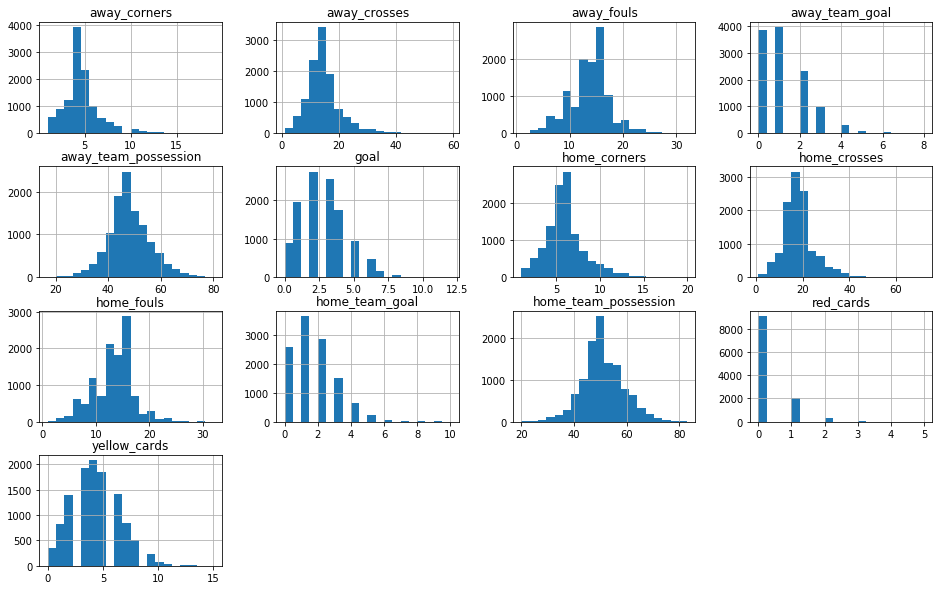

In [39]:
# Checking the distributions of the numeric columns
top_leagues_match_df[['away_corners', 'away_crosses', 'away_fouls', 'away_team_goal', 
                      'away_team_possession', 'goal', 'home_corners', 'home_crosses', 
                      'home_fouls', 'home_team_goal', 'home_team_possession', 'red_cards', 
                      'yellow_cards']].hist(figsize=(16, 10), bins=20);

<a id='eda'></a>
## Exploratory Data Analysis

The exploratory section of the report is where I'm going to compute statistics and create visualizations with the goal of addressing the research questions posed in the [Introduction](#intro) section. 

<a id='bc_function'></a>
As a preparatory to the further investigations, I created a function to help the creation of bar charts that will be undoubtedly valuable.

In [40]:
def draw_generic_barchart(df=pd.DataFrame({'names_examples': ['name_example', 'name_example', 
                                                              'name_example', 'name_example'], 
                                           'values': [0.1, 0.5, 0.2, 0.7]}), 
                          colors = ['red', 'green', 'blue', 'black'], 
                          title = 'Function Result Example', 
                          x_label = 'Label example', 
                          y_label = 'Label example', 
                          xticks = np.arange(0, 1.1, 0.1)):
    
    # Creates barchart
    ax = df.iloc[:, 1].plot(kind='barh', 
                            figsize=(12, 8), 
                            alpha=0.8, 
                            color= colors, 
                            zorder=2, 
                            width=0.7, 
                            legend=False)
    
    # Set title and axis labels
    ax.set_title(title, size=22, weight='bold')
    ax.set_xlabel(x_label, labelpad=20, size=16)
    ax.set_ylabel(y_label, labelpad=20, size=16)
    
    # Set yticklabels and xticks
    ax.set_yticklabels(df.iloc[:, 0], size=13);
    ax.set_xticks(xticks)

    # Turn spines invisible
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Defining not to draw the ticks
    ax.tick_params(axis="both", which="both", bottom=False, left=False)
    
    # Creating vertical dashed lines 
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.6, color='#eeeeee', zorder=0)
        
    # Displaying the value of the bar after the bar
    for i, (value, name) in enumerate(zip(df.iloc[:, 1], df.iloc[:, 0])):
        ax.text(value, i, f' {round(value, 3)}', size=12, ha='left', va='center', color='#666666')

        
# Uncoment next line to see an example of a bar chart      
# draw_generic_barchart()

### Which are the best teams at home-field games?

The teams will be evaluated on their win rate at home-field matches, since the victory is the major goal of any professional soccer game. The top 10 best team win rates will be displayed in a visualization using the [Bar Chart Function](#bc_function) created above.

In [41]:
# Counting results by home team
home_team_results_count = top_leagues_match_df.groupby(['home_team_name', 'result'])['result'].count()

# Calculating the percentages of the results
home_team_results_pct = home_team_results_count / home_team_results_count.groupby(level=0).sum()

# Selecting the top 10 teams at home-field games
best_playing_home_teams = home_team_results_pct.xs('H', level=1, drop_level=False).sort_values(ascending=False)[:10].sort_values()

# Creating a DataFrame in order to be able to use the Bar Chart Function
best_playing_home_teams_df = pd.DataFrame({'team_name': best_playing_home_teams.index.get_level_values(0), 
                                           'win_rate': best_playing_home_teams.values})
best_playing_home_teams_df


,team_name,win_rate
0,Roma,0.642384
1,Borussia Dortmund,0.647059
2,Chelsea,0.664474
3,Atlético Madrid,0.677632
4,Juventus,0.695364
5,Manchester City,0.743421
6,Manchester United,0.763158
7,FC Bayern Munich,0.801471
8,Real Madrid CF,0.848684
9,FC Barcelona,0.861842


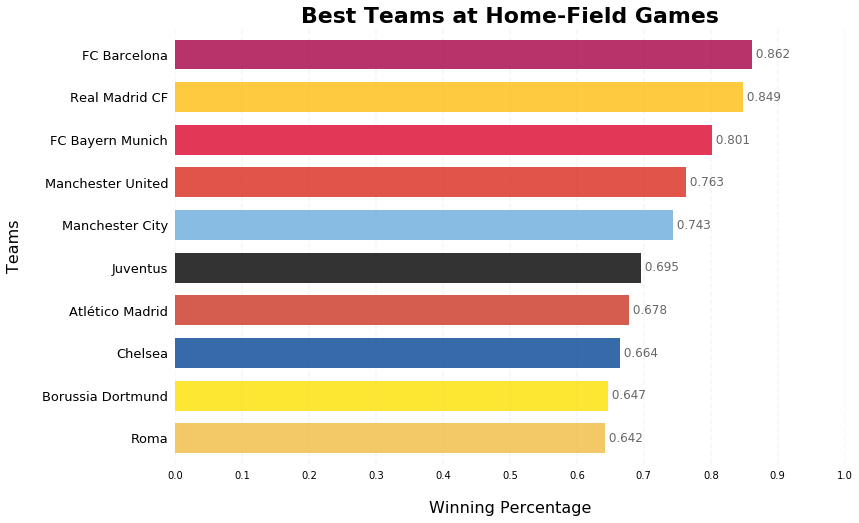

In [42]:
draw_generic_barchart(df = best_playing_home_teams_df, 
                      colors = ['#F0BC42', '#FDE100', '#034694', 
                                '#CB3524', '#000000', '#6CABDD', 
                                '#DA291C', '#DC052D', '#FEBE10', 
                                '#A50044'], 
                      title = 'Best Teams at Home-Field Games', 
                      x_label = "Winning Percentage", 
                      y_label = "Teams", 
                      xticks = np.arange(0, 1.1, 0.1))

### Which are the best teams at away-field games?

In the same way as the best teams at home-field matches, the teams will be evaluated on their win rate. The top 10 best team win rates will be displayed in a visualization using the [Bar Chart Function](#bc_function) previously created.

In [43]:
# Counting results by away team
away_team_results_count = top_leagues_match_df.groupby(['away_team_name', 'result'])['result'].count()

# # Calculating the percentages of the results
away_team_results_pct = away_team_results_count / away_team_results_count.groupby(level=0).sum()

# Selecting the top 10 teams at away-field games
best_playing_away_teams = away_team_results_pct.xs('A', level=1, drop_level=False).sort_values(ascending=False)[:10].sort_values()

# Creating a DataFrame in order to be able to use the Bar Chart Function
best_playing_away_teams_df = pd.DataFrame({'team_name': best_playing_away_teams.index.get_level_values(0), 
                                           'win_pctg': best_playing_away_teams.values})
best_playing_away_teams_df

,team_name,win_pctg
0,Roma,0.427632
1,Bayer 04 Leverkusen,0.448529
2,Arsenal,0.480263
3,Chelsea,0.493421
4,Manchester United,0.500000
5,Borussia Dortmund,0.507353
6,Juventus,0.560000
7,FC Bayern Munich,0.617647
8,Real Madrid CF,0.651316
9,FC Barcelona,0.677632


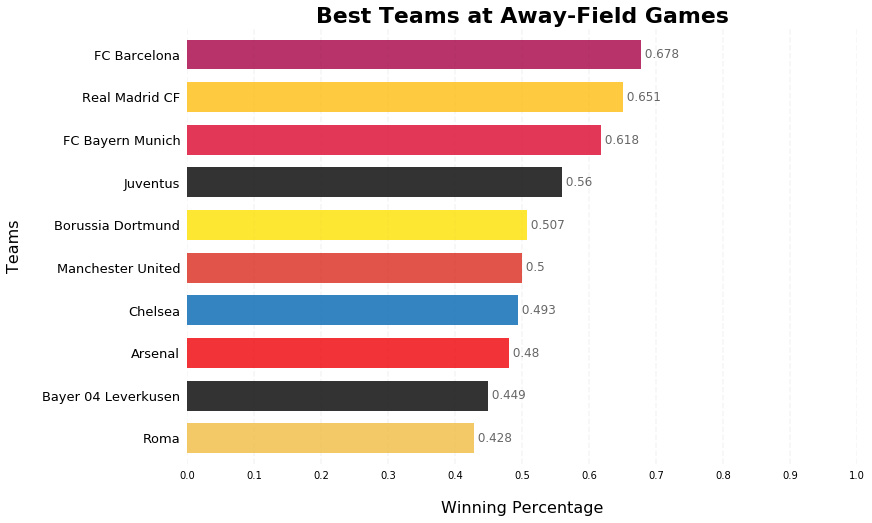

In [44]:
draw_generic_barchart(df = best_playing_away_teams_df, 
                      colors = ['#F0BC42', '#000000', '#EF0107', 
                                '#0066B2', '#DA291C', '#FDE100', 
                                '#000000', '#DC052D', '#FEBE10', 
                                '#A50044'], 
                      title = 'Best Teams at Away-Field Games', 
                      x_label = "Winning Percentage", 
                      y_label = "Teams", 
                      xticks = np.arange(0, 1.1, 0.1))

### Which league had the biggest fouls per match average?

To investigate this question, I'm going to gather the necessary data by grouping the dataframe by league and selecting the mean value of fouls for each league. After that, I'll be creating the visualization with the [Bar Chart Function](#bc_function).

It's necessary to use the mean value of fouls per game instead of the total numbers of fouls because the leagues have distinct total number of matches.

In [45]:
# Gathering the fouls per match in home and away field games by league
home_team_fouls_per_match_by_league= top_leagues_match_df.groupby('league_name').mean().home_fouls.reset_index().round(2)
away_team_fouls_per_match_by_league= top_leagues_match_df.groupby('league_name').mean().away_fouls.reset_index().round(2)

# Merging the above dataframes
fouls_per_match_by_league = pd.merge(home_team_fouls_per_match_by_league, 
                                     away_team_fouls_per_match_by_league, 
                                     left_on='league_name', 
                                     right_on='league_name', 
                                     how = 'outer')

# Calculating the average fouls per league
fouls_per_match_by_league['fouls_by_match'] = round((fouls_per_match_by_league['home_fouls'] + 
                                                     fouls_per_match_by_league['away_fouls']) / 2, 2)

# Dropping useless columns
fouls_per_match_by_league.drop(['home_fouls', 'away_fouls'], axis=1, inplace=True)

# Sorting values
fouls_per_match_by_league.sort_values(by='fouls_by_match', inplace=True, ascending=True)

fouls_per_match_by_league

,league_name,fouls_by_match
0,England Premier League,11.06
3,Spain LIGA BBVA,13.72
2,Italy Serie A,14.50
1,Germany 1. Bundesliga,14.78


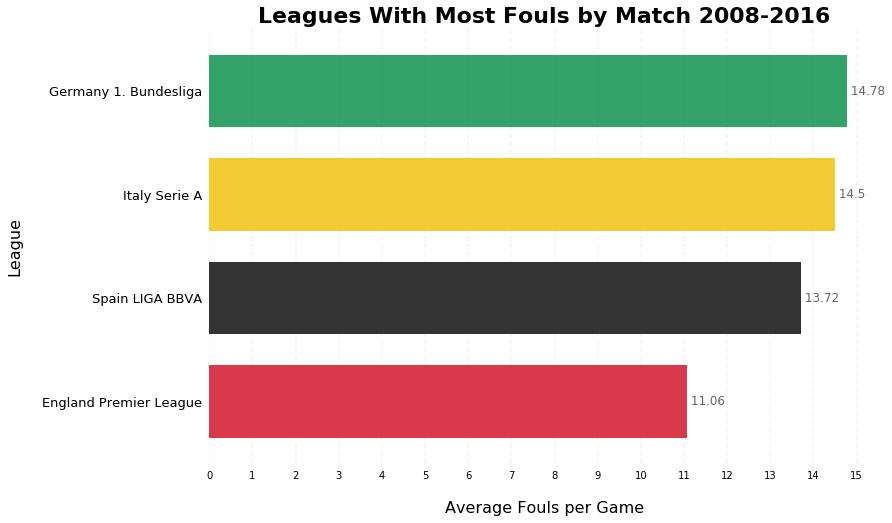

In [46]:
draw_generic_barchart(df = fouls_per_match_by_league, 
                      colors = ['#CF081F', '#000000', '#F1BF00', '#008C45'], 
                      title = 'Leagues With Most Fouls by Match 2008-2016', 
                      x_label = "Average Fouls per Game", 
                      y_label = "League", 
                      xticks = np.arange(0, 16, 1))

### Which teams had the biggest ball possession mean?

The procedure here is similar to the fouls inspection above, but for this question I'm going to group the dataframe by team and select the mean values for the possession columns. Then, the visualization will be created using the [Bar Chart Function](#bc_function).

In [47]:
# Getting team possession mean in home and away field matches by team
home_team_possession_by_team = top_leagues_match_df.groupby('home_team_name').mean().home_team_possession.reset_index()
away_team_possession_by_team = top_leagues_match_df.groupby('away_team_name').mean().away_team_possession.reset_index()

# Merging the DataFrames
possession_by_team = pd.merge(home_team_possession_by_team, 
                              away_team_possession_by_team, 
                              left_on='home_team_name', 
                              right_on='away_team_name', 
                              how = 'outer')

# Calculating the average possession by team
possession_by_team['possession'] = (possession_by_team['home_team_possession'] + 
                                    possession_by_team['away_team_possession']) / 2

# Dropping useless columns
possession_by_team.drop(['home_team_possession', 'away_team_possession', 'away_team_name'], axis=1, inplace=True)

# Renaming home_team_name column
possession_by_team.rename({'home_team_name': 'team_name'}, axis=1, inplace=True)

# Sorting values
teams_most_possession = possession_by_team.sort_values(by='possession', ascending=False)[:10].sort_values(by='possession')

teams_most_possession

,team_name,possession
29,Chelsea,55.523026
97,Roma,55.569231
82,RC Celta de Vigo,55.842105
59,Inter,55.871079
4,Arsenal,56.144737
91,Real Madrid CF,56.641447
69,Manchester United,56.648026
71,Milan,56.842062
41,FC Bayern Munich,63.003676
40,FC Barcelona,66.661184


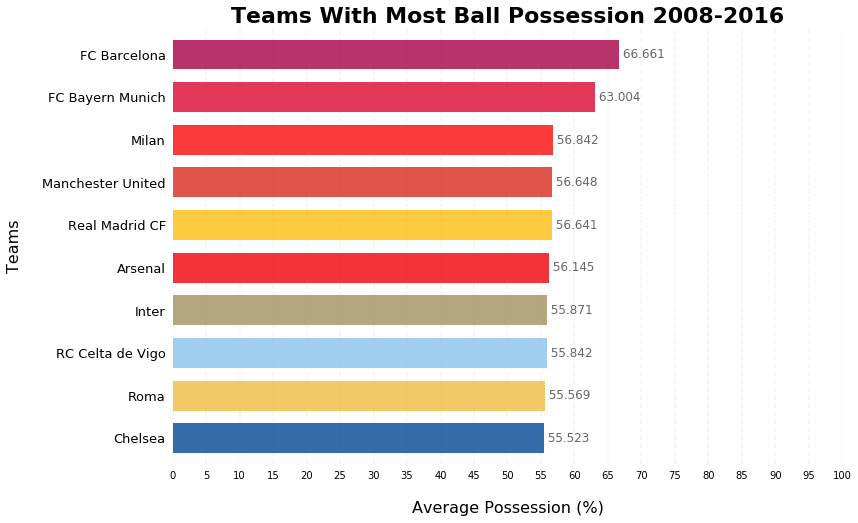

In [48]:
draw_generic_barchart(df = teams_most_possession, 
                      colors = ['#034694', '#F0BC42', '#8AC3EE', '#A29161', '#EF0107', 
                                '#FEBE10', '#DA291C', '#FB090B', '#DC052D', '#A50044'], 
                      title = 'Teams With Most Ball Possession 2008-2016', 
                      x_label = "Average Possession (%)", 
                      y_label = "Teams", 
                      xticks = np.arange(0, 101, 5))


### Which teams had most corners per match?

It's the same main idea as the preceding studies, but this time the I'll be observing the corners by team.

In [49]:
# Getting corners per match by team in home and away field matches
home_team_corners_mean_by_team = top_leagues_match_df.groupby('home_team_name').mean().home_corners.reset_index()
away_team_corners_mean_by_team = top_leagues_match_df.groupby('away_team_name').mean().away_corners.reset_index()

# Merging above DataFrames
corners_mean_by_team = pd.merge(home_team_corners_mean_by_team, 
                           away_team_corners_mean_by_team, 
                           left_on='home_team_name', 
                           right_on='away_team_name', 
                           how = 'outer')

# Calculating corners per match by team
corners_mean_by_team['corners_per_match'] = round((corners_mean_by_team['home_corners'] + 
                                                   corners_mean_by_team['away_corners']) / 2, 2)

# Dropping useless columns
corners_mean_by_team.drop(['home_corners', 'away_corners', 'away_team_name'], axis=1, inplace=True)

# Renaming home_team_name
corners_mean_by_team.rename({'home_team_name': 'team_name'}, axis=1, inplace=True)

# Selecting teams with most corners per match
teams_biggest_corner_avg = corners_mean_by_team.sort_values(by='corners_per_match', 
                                                            ascending=False)[:10].sort_values(by='corners_per_match')

teams_biggest_corner_avg

,team_name,corners_per_match
91,Real Madrid CF,6.21
69,Manchester United,6.41
40,FC Barcelona,6.46
114,Tottenham Hotspur,6.46
29,Chelsea,6.52
61,Karlsruher SC,6.53
4,Arsenal,6.60
66,Liverpool,6.67
68,Manchester City,6.68
41,FC Bayern Munich,6.76


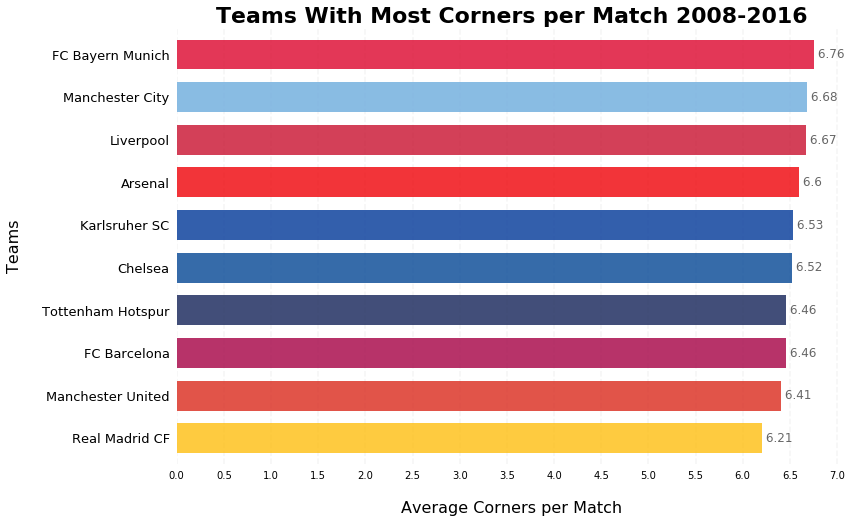

In [50]:
draw_generic_barchart(df = teams_biggest_corner_avg, 
                      colors = ['#FEBE10', '#DA291C', '#A50044', '#132257', '#034694', 
                                '#003798', '#EF0107', '#C8102E', '#6CABDD', '#DC052D'], 
                      title = 'Teams With Most Corners per Match 2008-2016', 
                      x_label = "Average Corners per Match", 
                      y_label = "Teams", 
                      xticks = np.arange(0, 7.1, 0.5))

### Which are the teams with most crosses?

The same process used when analysing the average corners per match can be used here by changing the observed feature for crosses by match.

In [51]:
# Getting crosses per match by team in home and away field matches
home_team_crosses_mean_by_team = top_leagues_match_df.groupby('home_team_name').mean().home_crosses.reset_index()
away_team_crosses_mean_by_team = top_leagues_match_df.groupby('away_team_name').mean().away_crosses.reset_index()

# Merging above DataFrames
crosses_mean_by_team = pd.merge(home_team_crosses_mean_by_team, 
                           away_team_crosses_mean_by_team, 
                           left_on='home_team_name', 
                           right_on='away_team_name', 
                           how = 'outer')

# Calculating crosses per match by team
crosses_mean_by_team['crosses_per_match'] = round((crosses_mean_by_team['home_crosses'] + 
                                                   crosses_mean_by_team['away_crosses']) / 2, 2)

# Dropping useless columns
crosses_mean_by_team.drop(['home_crosses', 'away_crosses', 'away_team_name'], axis=1, inplace=True)

# Renaming home_team_name
crosses_mean_by_team.rename({'home_team_name': 'team_name'}, axis=1, inplace=True)

# Selecting teams with most crosses per match
teams_biggest_crosses_avg = crosses_mean_by_team.sort_values(by='crosses_per_match', 
                                                            ascending=False)[:10].sort_values(by='crosses_per_match')

teams_biggest_crosses_avg

,team_name,crosses_per_match
114,Tottenham Hotspur,19.43
66,Liverpool,19.46
127,Wolverhampton Wanderers,19.48
29,Chelsea,19.74
25,Cardiff City,20.08
107,Southampton,20.10
109,Stoke City,20.11
4,Arsenal,21.12
89,Reading,21.79
69,Manchester United,22.63


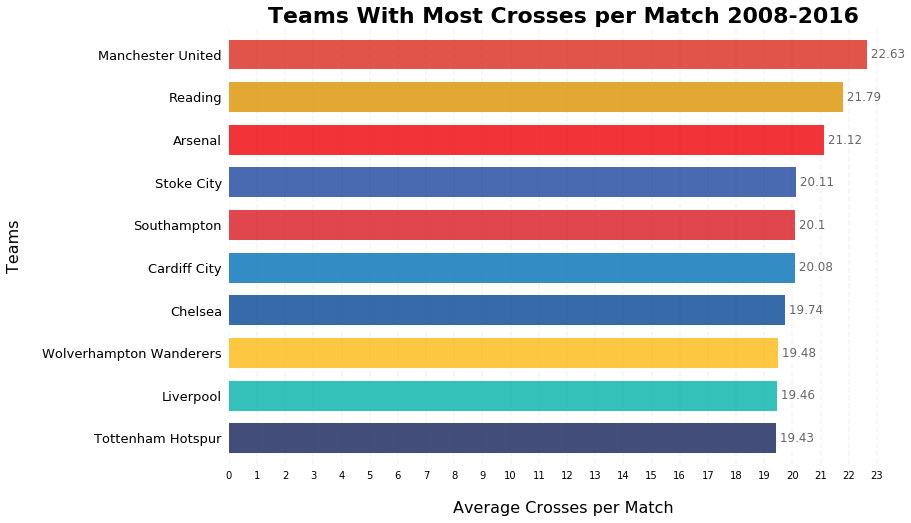

In [52]:
draw_generic_barchart(df = teams_biggest_crosses_avg, 
                      colors = ['#132257', '#00B2A9', '#FDB913', '#034694', '#0070B5', 
                                '#D71920', '#1B449C', '#EF0107', '#DD9300', '#DA291C'], 
                      title = 'Teams With Most Crosses per Match 2008-2016', 
                      x_label = "Average Crosses per Match", 
                      y_label = "Teams", 
                      xticks = np.arange(0, 24, 1))


### Which are the best teams in nacional leagues by season?

This time, the teams will be evaluated based on the points they made divided by the maximum points they could've done in each season.

The top 10 teams with higher possible points percentage in each season will be displayed in a animation created with [matplotlib animation module](https://matplotlib.org/3.2.1/api/animation_api.html).

First things first, I'm going to select the count of each result grouped by team name and season:

In [53]:
# Getting the count of results by each team and season at home and away field games
home_team_results_count = top_leagues_match_df.groupby(['home_team_name', 'season', 'result'])['result'].count()
away_team_results_count = top_leagues_match_df.groupby(['away_team_name', 'season', 'result'])['result'].count()

# Merging DataFrames
team_results_count = pd.merge(home_team_results_count, 
                              away_team_results_count, 
                              left_on=home_team_results_count.index, 
                              right_on=away_team_results_count.index)

team_results_count

,key_0,result_x,result_y
0,"(1. FC Kaiserslautern, 2010/2011, A)",5,7
1,"(1. FC Kaiserslautern, 2010/2011, D)",6,1
2,"(1. FC Kaiserslautern, 2010/2011, H)",6,9
3,"(1. FC Kaiserslautern, 2011/2012, A)",10,2
4,"(1. FC Kaiserslautern, 2011/2012, D)",5,6
...,...,...,...
1830,"(Wolverhampton Wanderers, 2011/2012, D)",3,7
1831,"(Wolverhampton Wanderers, 2011/2012, H)",3,10
1832,"(Xerez Club Deportivo, 2009/2010, A)",9,2
1833,"(Xerez Club Deportivo, 2009/2010, D)",4,6


The team name, season and result of the match are all together in a single column. Besides that, the column names are not friendly as well.  
In the next cell I'll separating the information and renaming the columns.

In [54]:
# Creating separeted columns
team_results_count['team_name'] = team_results_count.key_0.str[0]
team_results_count['season'] = team_results_count.key_0.str[1]
team_results_count['result'] = team_results_count.key_0.str[2]

# Dropping key_0
team_results_count.drop('key_0', axis=1, inplace=True)

# Renaming result columns
team_results_count.rename({'result_x': 'home_result_count', 'result_y': 'away_result_count'}, axis=1, inplace=True)


team_results_count

,home_result_count,away_result_count,team_name,season,result
0,5,7,1. FC Kaiserslautern,2010/2011,A
1,6,1,1. FC Kaiserslautern,2010/2011,D
2,6,9,1. FC Kaiserslautern,2010/2011,H
3,10,2,1. FC Kaiserslautern,2011/2012,A
4,5,6,1. FC Kaiserslautern,2011/2012,D
...,...,...,...,...,...
1830,3,7,Wolverhampton Wanderers,2011/2012,D
1831,3,10,Wolverhampton Wanderers,2011/2012,H
1832,9,2,Xerez Club Deportivo,2009/2010,A
1833,4,6,Xerez Club Deportivo,2009/2010,D


That's better! But it's still far away from achieving what answering the question needs: finding the possible points percentage of each team by season.

To reach this, the first step is calculate the number of wins, loses and draws.

In [55]:
# Selecting matches won by the home team
home_wins_away_losses = team_results_count.query('result == "H"')[['team_name', 'season', 
                                                       'home_result_count', 'away_result_count']]
# Renaming result columns
home_wins_away_losses.rename({'home_result_count': 'home_wins', 'away_result_count': 'away_losses'}, axis=1, inplace=True)


# Selecting matches won by the away team
away_wins_home_losses = team_results_count.query('result == "A"')[['team_name', 'season', 
                                                       'home_result_count', 'away_result_count']]
# Renaming result columns
away_wins_home_losses.rename({'home_result_count': 'home_losses', 'away_result_count': 'away_wins'}, axis=1, inplace=True)


# Selecting draws
draws = team_results_count.query('result == "D"')[['team_name', 'season', 
                                           'home_result_count', 'away_result_count']]
# Renaming result columns
draws.rename({'home_result_count': 'home_draws', 'away_result_count': 'away_draws'}, axis=1, inplace=True)

# Merging all the created DataFrames above
team_wins_draws_losses = pd.merge(pd.merge(home_wins_away_losses, 
                                           away_wins_home_losses, 
                                           on=['team_name', 'season']), 
                                  draws, on=['team_name', 'season'])

# Calculating total number of wins, losses and draws
team_wins_draws_losses['wins'] = team_wins_draws_losses['home_wins'] + team_wins_draws_losses['away_wins']
team_wins_draws_losses['losses'] = team_wins_draws_losses['home_losses'] + team_wins_draws_losses['away_losses']
team_wins_draws_losses['draws'] = team_wins_draws_losses['home_draws'] + team_wins_draws_losses['away_draws']

# Dropping useless columns
team_wins_draws_losses.drop(['home_wins', 'away_wins', 
                             'home_losses', 'away_losses', 
                             'home_draws', 'away_draws'], axis=1, inplace=True)



team_wins_draws_losses

,team_name,season,wins,losses,draws
0,1. FC Kaiserslautern,2010/2011,13,14,7
1,1. FC Kaiserslautern,2011/2012,4,19,11
2,1. FC Köln,2008/2009,11,17,6
3,1. FC Köln,2009/2010,9,14,11
4,1. FC Köln,2010/2011,13,16,5
...,...,...,...,...,...
584,Wigan Athletic,2012/2013,9,20,9
585,Wolverhampton Wanderers,2009/2010,9,18,11
586,Wolverhampton Wanderers,2010/2011,11,20,7
587,Wolverhampton Wanderers,2011/2012,5,23,10


Now that the dataframe have the all the information needed it's easy to calculate the possible points percentage.

In [56]:
# Creating a copy of the team_wins_draws_losses DataFrame where the percentage will be calculated
team_p_points_pct_season = team_wins_draws_losses.copy()

# Calculating percentage
team_p_points_pct_season['possible_points_pct'] = ((team_wins_draws_losses['wins'] * 3 + team_wins_draws_losses['draws']) / 
                                                    ((team_wins_draws_losses['wins'] + 
                                                      team_wins_draws_losses['losses'] + 
                                                      team_wins_draws_losses['draws']) * 3)).round(3)

# Drop wins, losses and draws columns
team_p_points_pct_season.drop(['wins', 'losses', 'draws'], axis=1, inplace=True)

team_p_points_pct_season

,team_name,season,possible_points_pct
0,1. FC Kaiserslautern,2010/2011,0.451
1,1. FC Kaiserslautern,2011/2012,0.225
2,1. FC Köln,2008/2009,0.382
3,1. FC Köln,2009/2010,0.373
4,1. FC Köln,2010/2011,0.431
...,...,...,...
584,Wigan Athletic,2012/2013,0.316
585,Wolverhampton Wanderers,2009/2010,0.333
586,Wolverhampton Wanderers,2010/2011,0.351
587,Wolverhampton Wanderers,2011/2012,0.219


Let's select the top 10 teams for each season...

In [57]:
best_teams_2008_2009 = team_p_points_pct_season.query('season == "2008/2009"').sort_values(by=['possible_points_pct'], 
                                                                                           ascending=False)[:10]
best_teams_2009_2010 = team_p_points_pct_season.query('season == "2009/2010"').sort_values(by=['possible_points_pct'], 
                                                                                           ascending=False)[:10]
best_teams_2010_2011 = team_p_points_pct_season.query('season == "2010/2011"').sort_values(by=['possible_points_pct'], 
                                                                                           ascending=False)[:10]
best_teams_2011_2012 = team_p_points_pct_season.query('season == "2011/2012"').sort_values(by=['possible_points_pct'], 
                                                                                           ascending=False)[:10]
best_teams_2012_2013 = team_p_points_pct_season.query('season == "2012/2013"').sort_values(by=['possible_points_pct'], 
                                                                                           ascending=False)[:10]
best_teams_2013_2014 = team_p_points_pct_season.query('season == "2013/2014"').sort_values(by=['possible_points_pct'], 
                                                                                           ascending=False)[:10]
best_teams_2014_2015 = team_p_points_pct_season.query('season == "2014/2015"').sort_values(by=['possible_points_pct'], 
                                                                                           ascending=False)[:10]
best_teams_2015_2016 = team_p_points_pct_season.query('season == "2015/2016"').sort_values(by=['possible_points_pct'], 
                                                                                           ascending=False)[:10]

best_teams_2008_2009

,team_name,season,possible_points_pct
308,Manchester United,2008/2009,0.789
174,FC Barcelona,2008/2009,0.763
130,Chelsea,2008/2009,0.728
405,Real Madrid CF,2008/2009,0.684
180,FC Bayern Munich,2008/2009,0.657
315,Milan,2008/2009,0.649
268,Juventus,2008/2009,0.649
20,Arsenal,2008/2009,0.632
542,VfB Stuttgart,2008/2009,0.627
252,Hertha BSC Berlin,2008/2009,0.618


... and then add they together:

In [58]:
# Appending best teams in each season in one single DataFrame (helpful when creating the visualization)
best_teams_all_seasons = best_teams_2008_2009.append(best_teams_2009_2010).append(best_teams_2010_2011).append(best_teams_2011_2012).append(best_teams_2012_2013).append(best_teams_2013_2014).append(best_teams_2014_2015).append(best_teams_2015_2016)
best_teams_all_seasons

,team_name,season,possible_points_pct
308,Manchester United,2008/2009,0.789
174,FC Barcelona,2008/2009,0.763
130,Chelsea,2008/2009,0.728
405,Real Madrid CF,2008/2009,0.684
180,FC Bayern Munich,2008/2009,0.657
315,Milan,2008/2009,0.649
268,Juventus,2008/2009,0.649
20,Arsenal,2008/2009,0.632
542,VfB Stuttgart,2008/2009,0.627
252,Hertha BSC Berlin,2008/2009,0.618


Finally the data is ready to be displayed!

To create the bar chart animation, I must display a bar chart for each season. For this purpose, I'll be creating a function for presenting bar charts different than the prior ones.

Due to the fact that there are several teams in this analysis and that every chart will display different teams, the succeeding cell is been used to create a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp) with the team names and colors that will be used in the bar chart function.

In [59]:
colors = dict(zip(['Manchester United', 'FC Barcelona', 'Chelsea', 'Real Madrid CF',
                   'FC Bayern Munich', 'Milan', 'Juventus', 'Arsenal',
                   'VfB Stuttgart', 'Hertha BSC Berlin', 'Roma', 'FC Schalke 04',
                   'Valencia CF', 'Tottenham Hotspur', 'SV Werder Bremen',
                   'Borussia Dortmund', 'Inter', 'Bayer 04 Leverkusen',
                   'Manchester City', 'Borussia Mönchengladbach', 'Napoli',
                   'Atlético Madrid', 'Liverpool', 'Sevilla FC', 'Leicester City'],
                  ["#DA291C", "#A50044", "#034694", "#FEBE10", "#DC052D", 
                   "#FB090B", "#000000", "#EF0107", "#ffed00", "#005CA9", 
                   "#F0BC42", "#004D9D", "#EE3524", "#132257", "#1D9053", 
                   "#FDE100", "#A29161", "#000000", "#6CABDD", "#000000", 
                   "#12A0D7", "#CB3524", "#00B2A9", "#C79100", "#003090", ]))

In [60]:
def draw_best_teams_barchart(current_season):
    """
    Creates a bar chart with the best teams of the season that is passed as an argument of the function.
    
    """
    # Selecting the best teams in the current season
    dff = best_teams_all_seasons[best_teams_all_seasons['season'].eq(current_season)].sort_values(by='possible_points_pct', 
                                                                                                  ascending=True)
    # Clearing axes before plotting bar chart
    ax.clear()
    # Creating bar chart 
    ax.barh(dff['team_name'], dff['possible_points_pct'], 
            color=[colors[t_name] for t_name in dff['team_name']], 
            alpha=0.95)

    for i, (value, name) in enumerate(zip(dff['possible_points_pct'], dff['team_name'])):
        # Writes the name of the team in it's bar
        ax.text(value, i, name + ' ', size=14, weight=600, ha='right', va='bottom', color='#ffffff')
        # Writes the bar value next to the bar
        ax.text(value, i, f' {value:}', size=14, ha='left', va='center')
    
    # Writes the current season in the chart
    ax.text(1, 0.1, current_season, transform=ax.transAxes, color='#777777', size=20, ha='right', weight=800)
    
    # Works as xlabel below the title
    ax.text(0, 1.06, 'Percentage of points made', transform=ax.transAxes, size=12, color='#777777')
    # Set x axis position to the top
    ax.xaxis.set_ticks_position('top')
    # Set xticks color and label size
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    # Set empty list for yticks
    ax.set_yticks([])
    # Draw lines for the major x ticks
    ax.grid(which='major', axis='x', linestyle='-')
    # Set axis below the bars and others artistics details
    ax.set_axisbelow(True)
    # Writes the title of the chart
    ax.text(0, 1.15, 'Best Teams in Nacional Leagues by Season From 2008 to 2016',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    
    # Erase the spines of the chart
    plt.box(False)

# Uncoment below lines to see an example for the 2015/2016 season
# fig, ax = plt.subplots(figsize=(15, 8))
# draw_best_teams_barchart('2015/2016')

<a id='animation'></a>
Now it's possible to create an animation using the bar chart function above for each season as a frame.

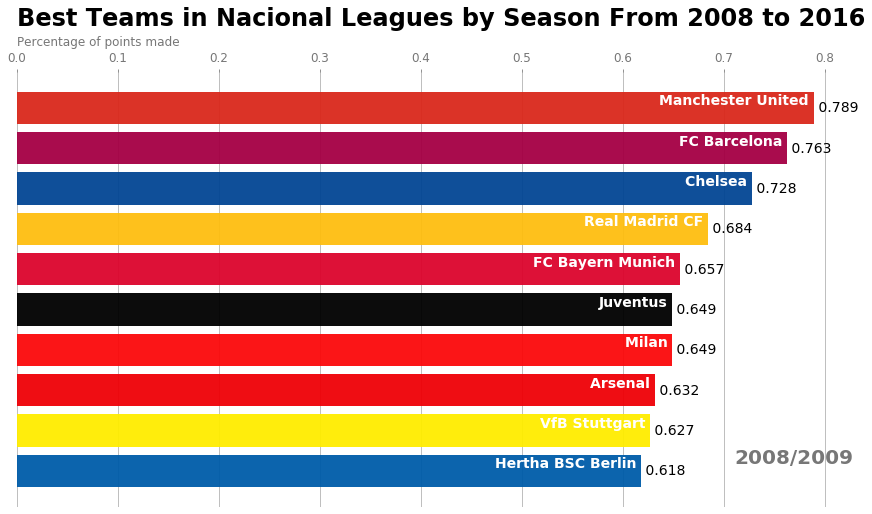

In [61]:
# Creating the animation
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, 
                                   draw_best_teams_barchart, 
                                   frames=['2008/2009', '2009/2010', '2010/2011', 
                                           '2011/2012', '2012/2013', '2013/2014', 
                                           '2014/2015', '2015/2016'], 
                                   interval=2000)

# Using HTML module to display the animation on the browser
HTML(animator.to_jshtml())

### Are there any strong correlations between the result of the match and the ball possession, team fouls, team crosses or team corners?

To measure the correlation between the listed variables and the result I'll be using the [Pearson Correlation Coefficient](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/) which returns values from -1 to 1, meaning the degree of correlation.

> **Perfect Negative Correlation (-1):** everytime a variable decreases, the other variable increases and vice versa.  
> **Zero Correlation (0):** there's no evidence that the variables have correlation.  
> **Perfect Positive Correlation (1):** everytime a variable increases/decreases, the other variable increases/decreases as well.  


In [62]:
print('<'*16, 'PEARSON CORRELATION COEFFICIENT', '>'*16)
print()

# Creating numeric result for the home team (home victory is positive, away victory is negative)
top_leagues_match_df['home_numeric_result'] = top_leagues_match_df.result.map({'H': 1, 'D': 0, 'A': -1})

print('='*65)
print('HOME TEAM COLUMNS <--> HOME TEAM RESULTS')
print('='*65)

# Displaying PCC for home columns 
for column_name in ['home_fouls', 'home_corners', 'home_crosses', 'home_team_possession']:
    print(column_name + ':', 
          round(top_leagues_match_df['home_numeric_result'].corr(top_leagues_match_df[column_name], method='pearson'), 4))

# Creating numeric result for the away team (away victory is positive, home victory is negative)
top_leagues_match_df['away_numeric_result'] = top_leagues_match_df.result.map({'H': -1, 'D': 0, 'A': 1})

print('='*65)
print('AWAY TEAM COLUMNS <--> AWAY TEAM RESULTS')
print('='*65)

# Displaying PCC for away columns
for column_name in ['away_fouls', 'away_corners', 'away_crosses', 'away_team_possession']:
    print(column_name + ':', 
          round(top_leagues_match_df['away_numeric_result'].corr(top_leagues_match_df[column_name], method='pearson'), 4))
                    
# Dropping created columns from top_leagues_match_df
top_leagues_match_df.drop(['home_numeric_result', 'away_numeric_result'], axis=1, inplace=True)

<<<<<<<<<<<<<<<< PEARSON CORRELATION COEFFICIENT >>>>>>>>>>>>>>>>

HOME TEAM COLUMNS <--> HOME TEAM RESULTS
home_fouls: -0.0551
home_corners: 0.0343
home_crosses: -0.0712
home_team_possession: 0.1575
AWAY TEAM COLUMNS <--> AWAY TEAM RESULTS
away_fouls: -0.02
away_corners: 0.0484
away_crosses: -0.0418
away_team_possession: 0.1727


### Are there any matches with exceptional game values?

A fun aproach when exploring soccer data is to look at matches that have unexpected values, such as a large number of red cards, fouls, or crosses, for example.

A good way to look at these values is to use [Pandas describe method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html), utilized before when checking top_leagues_match_df properties, and then query for unusual data.

In [63]:
top_leagues_match_df.describe()

,stage,home_team_goal,away_team_goal,goal,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,yellow_cards,red_cards,home_team_possession,away_team_possession
count,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000,11545.000000
mean,19.060546,1.575054,1.166392,2.741447,13.210307,13.673971,5.836553,4.560849,18.477609,14.485751,4.239498,0.245041,50.885665,48.062625
std,10.766970,1.316680,1.145639,1.694361,3.712178,3.748259,2.437375,2.052573,6.839769,5.923352,2.189854,0.517519,7.917044,7.993531
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,17.000000
25%,10.000000,1.000000,0.000000,2.000000,11.000000,11.000000,4.000000,4.000000,15.000000,11.000000,3.000000,0.000000,46.000000,44.000000
50%,19.000000,1.000000,1.000000,3.000000,14.000000,14.000000,6.000000,4.000000,18.000000,14.000000,4.000000,0.000000,50.000000,47.000000
75%,28.000000,2.000000,2.000000,4.000000,15.000000,16.000000,7.000000,5.000000,21.000000,17.000000,6.000000,0.000000,56.000000,53.000000
max,38.000000,10.000000,8.000000,12.000000,32.000000,32.000000,20.000000,19.000000,72.000000,59.000000,15.000000,5.000000,83.000000,80.000000


#### A match where the home team had 83% ball possession:

In [64]:
top_leagues_match_df.query('home_team_possession == 83')

,away_team_name,home_team_name,league_name,season,stage,date,home_team_goal,away_team_goal,goal,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,yellow_cards,red_cards,result,home_team_possession,away_team_possession
22678,CA Osasuna,FC Barcelona,Spain LIGA BBVA,2011/2012,4,2011-09-17 00:00:00,8,0,8,6.0,13.0,7.0,3.0,5.0,6.0,7.0,0.0,H,83.0,17.0


#### Matches where the away team had 80% ball possession:

In [65]:
top_leagues_match_df.query('away_team_possession == 80')

,away_team_name,home_team_name,league_name,season,stage,date,home_team_goal,away_team_goal,goal,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,yellow_cards,red_cards,result,home_team_possession,away_team_possession
4336,Liverpool,West Bromwich Albion,England Premier League,2014/2015,34,2015-04-25 00:00:00,0,0,0,12.0,12.0,2.0,4.0,11.0,18.0,1.0,0.0,D,20.0,80.0
10095,FC Bayern Munich,Hannover 96,Germany 1. Bundesliga,2015/2016,17,2015-12-19 00:00:00,0,1,1,9.0,8.0,5.0,5.0,6.0,15.0,0.0,0.0,A,20.0,80.0


#### A match where the home team scored 10 goals:

In [66]:
top_leagues_match_df.query('home_team_goal == 10')

,away_team_name,home_team_name,league_name,season,stage,date,home_team_goal,away_team_goal,goal,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,yellow_cards,red_cards,result,home_team_possession,away_team_possession
24334,Rayo Vallecano,Real Madrid CF,Spain LIGA BBVA,2015/2016,16,2015-12-20 00:00:00,10,2,12,11.0,11.0,10.0,4.0,22.0,12.0,4.0,2.0,H,53.0,47.0


#### A match where the home team crossed 72 times: 

In [67]:
top_leagues_match_df.query('home_crosses == 72')

,away_team_name,home_team_name,league_name,season,stage,date,home_team_goal,away_team_goal,goal,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,yellow_cards,red_cards,result,home_team_possession,away_team_possession
3877,Fulham,Manchester United,England Premier League,2013/2014,25,2014-02-09 00:00:00,2,2,4,3.0,6.0,10.0,1.0,72.0,6.0,0.0,0.0,D,76.0,24.0


#### The match with more expelled players:

In [68]:
top_leagues_match_df.query('red_cards == 5')

,away_team_name,home_team_name,league_name,season,stage,date,home_team_goal,away_team_goal,goal,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,yellow_cards,red_cards,result,home_team_possession,away_team_possession
21844,Racing Santander,Athletic Club de Bilbao,Spain LIGA BBVA,2008/2009,33,2009-04-26 00:00:00,2,1,3,14.0,15.0,7.0,4.0,21.0,10.0,13.0,5.0,H,51.0,40.0


#### The match with more yellow cards:

In [69]:
top_leagues_match_df.query('yellow_cards == 15')

,away_team_name,home_team_name,league_name,season,stage,date,home_team_goal,away_team_goal,goal,home_fouls,away_fouls,home_corners,away_corners,home_crosses,away_crosses,yellow_cards,red_cards,result,home_team_possession,away_team_possession
21825,Sevilla FC,Valencia CF,Spain LIGA BBVA,2008/2009,31,2009-04-19 00:00:00,3,1,4,20.0,23.0,5.0,12.0,19.0,23.0,15.0,1.0,H,51.0,49.0


<a id='conclusions'></a>
## Conclusions

In the Conclusions segment of the report I'll be restating the questions and important results of the analysis.  

Despite I tried my best to get the most accurate results possible,  it should be noted that the project has limitations and may contain minor mistakes due to errors or missing values in the database

### Which are the best teams at home-field games?

It seems fair to answer this question with the three teams that achieved more than 80% victory rate: 
<ol>
    <li> FC Barcelona - 86.2%</li>
    <li> Real Madrid CF - 84.9%</li>
    <li> FC Bayern Munich - 80.1%</li>
</ol>

To trully understand this terrific values there's many other variables that could (and should) be observed, such as competitiveness in each league, the average number of fans per match by team, the payroll of teams, etc. However, it's genuinely incredible that these three teams we're able to maintain such a high win rate throughout the years. 


### Which are the best teams at away-field games?

Curiously, the podium repeats itself with the same three teams that had the biggest win rates at home-field matches, showing that these teams do repeat what they've learned at home. 
<ol>
    <li> FC Barcelona - 67.8%</li>
    <li> Real Madrid CF - 65.1%</li>
    <li> FC Bayern Munich - 61.8%</li>
</ol>

When looking at the top 10 though, the advantage that the home teams have it's no secret, but there's some teams that certainly rely on home-field matches to stay at the top. Manchester City and Atlético Madrid, for instance, showed a huge win rate drop between their home-field and away-field matches, which can be crucial when determining which teams will go to the Champions League.


### Which league had the biggest fouls per match average?
<ol>
    <li> Germany 1. Bundesliga - 14.68</li>
    <li> Italy Serie A - 14.37</li>
    <li> Spain LIGA BBVA - 13.57</li>
    <li> England Premier League - 11.06</li>
</ol>


Although it is not possible to correlate the number of fouls with violence in leagues, it is probably a good idea to use shin guards and practice set pieces if you are thinking of playing in Serie A or Bundesliga.

### Which teams had the biggest ball possession average?

"If you play on possession, you don't have to defend, because there's only one ball" - Johan Cruyff

<ol>
    <li> FC Barcelona - 66.66%</li>
    <li> FC Bayern Munich - 63.00%</li>
    <li> Milan - 56.84%</li>
</ol>

I can't assure that Johan Cruyff was right, but it looks like it's working for Barcelona and Bayern Munich after checking their win rates.


### Which teams had most corners per match?

When I started asking questions, this was the most interesting for me, it would make perfect sense if the main European teams were at the top of the list, considering that a corner normally comes after a moment of attack pressure.

<ol>
    <li> FC Bayern Munich - 6.76</li>
    <li> Manchester City - 6.68</li>
    <li> Liverpool - 6.67</li>
</ol>

Though my assumption seems correct, the results are pretty close and Premier League seems dominate in terms of numbers of corners, hence, it was not possible to identify clearly correlation between the number of corners and the best teams.

### Which are the teams with most crosses per match?

The main reason for this question was to compare the number of corners with the number of crosses, in view of that a team could have a high number of crosses and a low number of corners. That way, it would be possible to identify teams which main strategy was to cross the ball in the area many times per match.

<ol>
    <li> Manchester United - 22.63</li>
    <li> Reading - 21.79</li>
    <li> Arsenal - 21.12</li>
</ol>

Visualizing the number of crosses it becomes unambiguous that the strategy of kicking the ball inside the area several times per game is widely adopted in the Premier League. It also becomes crystal clear that some teams like Reading, Southampton Wolverhampton Wanderers embraced this strategy on their games.

### Which are the best teams in nacional leagues by season?

To summarize the answer, I'll be only writing the best three teams for each season, but I do recommend to check the [complete visualization](#animation):

**2008/2009**
<ol>
        <li> Manchester United</li>
        <li> FC Barcelona</li>
        <li> Chelsea</li>
</ol>

**2009/2010**
<ol>
        <li> Chelsea</li>
        <li> Manchester United</li>
        <li> Roma</li>
</ol>

**2010/2011**
<ol>
        <li> FC Barcelona</li>
        <li> Real Madrid CF</li>
        <li> Borussia Dortmund</li>
</ol>

**2011/2012**
<ol>
        <li> Real Madrid CF</li>
        <li> FC Barcelona</li>
        <li> Borussia Dortmund</li>
</ol>

**2012/2013**
<ol>
        <li> Juventus</li>
        <li> Napoli</li>
        <li> Manchester City</li>
</ol>

**2013/2014**
<ol>
        <li> FC Bayern Munich</li>
        <li> FC Barcelona</li>
        <li> Real Madrid CF</li>
</ol>

**2014/2015**
<ol>
        <li> FC Barcelona</li>
        <li> FC Bayern Munich</li>
        <li> Manchester City</li>
</ol>

**2015/2016**
<ol>
        <li> FC Bayern Munich</li>
        <li> Juventus</li>
        <li> FC Barcelona</li>
</ol>


Barcelona's high level of performance is visible again, appearing on the podium in six of the eight seasons evaluated. It is also possible to identify significant growth in Bayern Munich's results.

### Are there any strong correlations between the result of the match and the ball possession, team fouls, team crosses or team corners?

I was hoping to discover a significant correlation between the number of corners and crosses and the result of the match, however it was not possible. The biggest correlation found was with the ball possession, but both the home team and the away team showed an not so strong positive correlation. It suggests that soccer really is a extremely random game.

### Are there any matches with exceptional game values?

The main objective of this question was to discover or remember matches with rare statistics. Therefore, I will link here the highlights of each match in case you arouse any curiosity.

<ul>
<li><a href="https://www.youtube.com/watch?v=ikv6vdooVuM">Home team 83% ball possession</a></li>
<li><a href="https://www.youtube.com/watch?v=tvrrYkG5QM4">Away team 80% ball possession</a></li>
<li><a href="https://www.youtube.com/watch?v=1kfXJs0daCU">Home team scored 10 goals</a></li>
<li><a href="https://www.youtube.com/watch?v=-A3STXzFrTQ">Home team crossed 72 times</a></li>
<li><a href="https://www.youtube.com/watch?v=RKDBXNQiFHE">5 expelled players (spanish)</a></li>
<li><a href="https://www.youtube.com/watch?v=xaINLpGrwX4">15 yellow cards (spanish)</a></li>
</ul>

<a id='appendix'></a>
## Appendix


Last but not least, I would like to leave the references used during the development of the report and thank @pratapvardhan and @jburnmurdoch for the awesome job on [how to create animations with matplotlib](https://colab.research.google.com/github/pratapvardhan/notebooks/blob/master/barchart-race-matplotlib.ipynb#scrollTo=Df_UrIvaPBJF).

I will also ask that if you notice any english errors in the report let me know, I'm not familiarized with english writing and I'm hoping to get better.

Suggestions are always appreciated :)
### References

<ul>
    <li><a href="https://mode.com/example-gallery/python_horizontal_bar/">Creating horizontal bar charts using pandas</a></li>
    <li><a href="https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f">Handling missing values with Pandas</a></li>
    <li><a href="https://bleacherreport.com/articles/786046-power-ranking-the-top-30-leagues-in-europe#slide30">Top 4 Leagues in Europe</a></li>
    <li><a href="https://www.sisense.com/glossary/data-cleaning/">What is Data Cleaning?</a></li>
    <li><a href="https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15">What is Exploratory Data Analysis?</a></li>
    <li><a href="https://www.espn.com.br/futebol/partida?jogoId=243000">Wigan Athletic vs Blackburn Rovers Statistics</a></li>
</ul>
